In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import cv2
import os

In [11]:
path = 'C:/Users/n10941576/OneDrive - Queensland University of Technology/python(vscode)/CNN/dataset'

In [21]:
os.listdir(path)
image_file_path = [path + '/' + i for i in os.listdir(path)]

In [76]:
data = np.empty((1000, 224, 224))
index = 0
for i in image_file_path:
    image_path = [i + '/' + j for j in os.listdir(i)]
    for loc in image_path:
        image = resize(cv2.imread(loc, cv2.IMREAD_GRAYSCALE), output_shape=(224, 224))
        data[index] = image
        index += 1

In [84]:
data[0]

array([[0.22791492, 0.22998074, 0.23617822, ..., 0.15322129, 0.15322129,
        0.15322129],
       [0.22791492, 0.22998074, 0.23617822, ..., 0.16036415, 0.16036415,
        0.16036415],
       [0.22791492, 0.22998074, 0.23617822, ..., 0.15756303, 0.15756303,
        0.15756303],
       ...,
       [0.07143326, 0.07519602, 0.07961904, ..., 0.00462185, 0.00437331,
        0.00400441],
       [0.07460328, 0.07689044, 0.08146352, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.07497374, 0.07703957, 0.08163515, ..., 0.00392157, 0.00257947,
        0.00058742]])

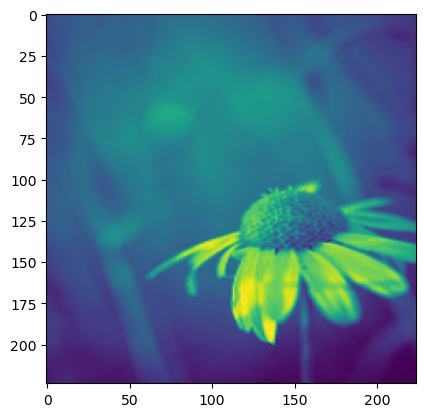

In [80]:
plt.imshow(data[0])

In [85]:
label = np.ndarray(shape=(1000,5), dtype = int)
for i in range(200):
  label[i] = [1, 0, 0, 0, 0]
  label[i+200] = [0, 1, 0, 0, 0]
  label[i+400] = [0, 0, 1, 0, 0]
  label[i+600] = [0, 0, 0, 1, 0]
  label[i+800] = [0, 0, 0, 0, 1]

In [115]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2)

In [119]:
lr = 0.1
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = (224, 224, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(lr = lr), metrics = ['accuracy'])

In [120]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 224, 224, 32)      320       
                                                                 
 activation_63 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 activation_64 (Activation)  (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                 

In [121]:
model.fit(x_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
20/20 [==============================] - 39s 2s/step - loss: 1.6089 - accuracy: 0.2172 - val_loss: 1.6025 - val_accuracy: 0.2625
Epoch 2/50
20/20 [==============================] - 38s 2s/step - loss: 1.6025 - accuracy: 0.2313 - val_loss: 1.5984 - val_accuracy: 0.2500
Epoch 3/50
20/20 [==============================] - 37s 2s/step - loss: 1.5873 - accuracy: 0.2500 - val_loss: 1.6001 - val_accuracy: 0.2750
Epoch 4/50
20/20 [==============================] - 36s 2s/step - loss: 1.6069 - accuracy: 0.2609 - val_loss: 1.5943 - val_accuracy: 0.2750
Epoch 5/50
20/20 [==============================] - 36s 2s/step - loss: 1.5872 - accuracy: 0.2594 - val_loss: 1.5797 - val_accuracy: 0.3250
Epoch 6/50
20/20 [==============================] - 36s 2s/step - loss: 1.5725 - accuracy: 0.3016 - val_loss: 1.5456 - val_accuracy: 0.3063
Epoch 7/50
20/20 [==============================] - 35s 2s/step - loss: 1.5504 - accuracy: 0.2922 - val_loss: 1.6418 - val_accuracy: 0.2250
Epoch 8/50
20/20 [==